In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data = pd.read_csv('merged_data.csv')

In [ ]:
print(data.columns)

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes', 'age', 'sex', 'cp', 'trestbps', 'chol',
       'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'target', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')


In [ ]:
target_columns = ['Diabetes', 'hypertension', 'stroke']

X = data.drop(columns=target_columns)
y = data[target_columns]


In [ ]:
X = X.fillna(X.mean())
y = y.fillna(0)


In [ ]:
y = y.apply(lambda x: x.apply(lambda val: 1 if val > 0 else 0))


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

y_pred_df = pd.DataFrame(y_pred, columns=target_columns)

print("Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_df))
print("Classification Report:\n", classification_report(y_test, y_pred_df, target_names=target_columns, zero_division=0))

accuracy_results={}
accuracy = accuracy_score(y_test, y_pred_df)
model_name = "RandomForest"
accuracy_results[model_name] = accuracy

Model Evaluation:
Accuracy Score: 0.8559755964702037
Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.72      0.76      0.74      7154
hypertension       0.99      0.93      0.96      1741
      stroke       0.99      1.00      1.00      4061

   micro avg       0.84      0.86      0.85     12956
   macro avg       0.90      0.89      0.90     12956
weighted avg       0.85      0.86      0.85     12956
 samples avg       0.36      0.36      0.36     12956




Confusion Matrix for Diabetes:
[[18326  2057]
 [ 1749  5405]]


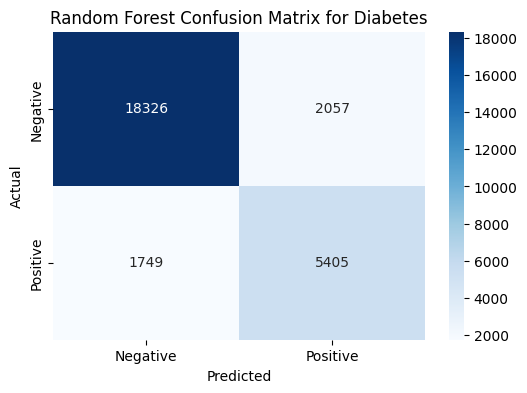


Confusion Matrix for hypertension:
[[25787     9]
 [  129  1612]]


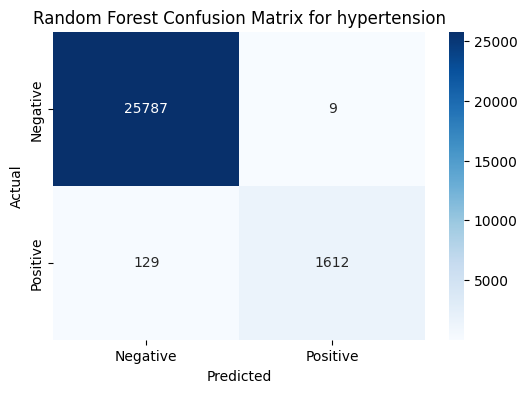


Confusion Matrix for stroke:
[[23451    25]
 [    0  4061]]


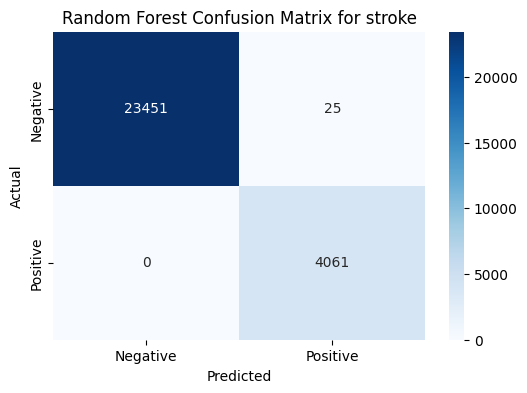

In [ ]:
for idx, target in enumerate(target_columns):
    print(f"\nConfusion Matrix for {target}:")
    cm = confusion_matrix(y_test.iloc[:, idx], y_pred_df.iloc[:, idx])
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"Random Forest Confusion Matrix for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
models = {}
for target in target_columns:
    model = xgb.XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train[target])
    models[target] = model

y_pred = pd.DataFrame({target: model.predict(X_test) for target, model in models.items()})

print("Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_columns, zero_division=0))

accuracy = accuracy_score(y_test, y_pred)
model_name = "XGBoost"
accuracy_results[model_name] = accuracy

Model Evaluation:
Accuracy Score: 0.8617859607074119
Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.74      0.79      0.77      7154
hypertension       0.97      0.86      0.92      1741
      stroke       0.98      1.00      0.99      4061

   micro avg       0.84      0.87      0.85     12956
   macro avg       0.90      0.89      0.89     12956
weighted avg       0.85      0.87      0.86     12956
 samples avg       0.36      0.36      0.36     12956




Confusion Matrix for Diabetes:
[[18402  1981]
 [ 1483  5671]]


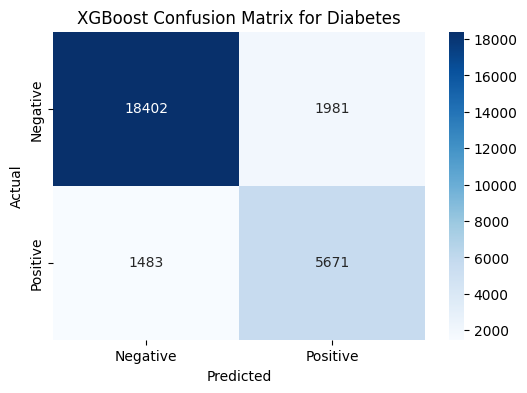


Confusion Matrix for hypertension:
[[25754    42]
 [  236  1505]]


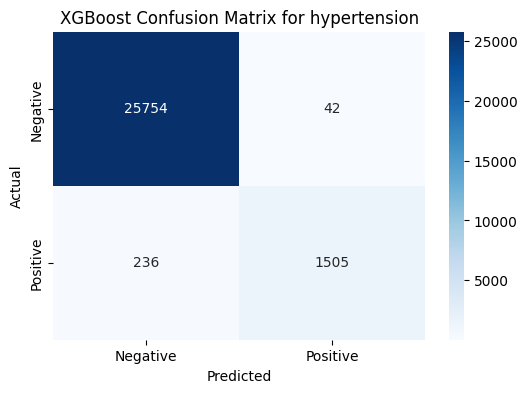


Confusion Matrix for stroke:
[[23398    78]
 [    0  4061]]


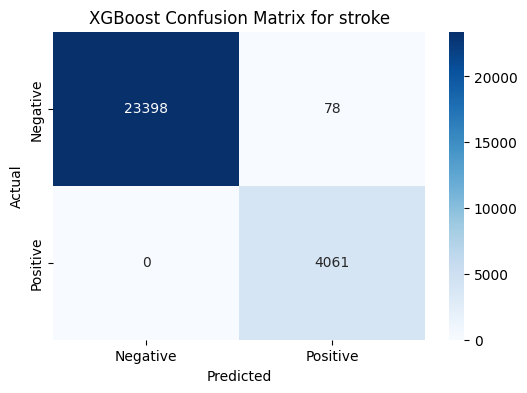

In [ ]:
for target in target_columns:
    print(f"\nConfusion Matrix for {target}:")
    cm = confusion_matrix(y_test[target], y_pred[target])
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"XGBoost Confusion Matrix for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors (KNN) Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=target_columns,zero_division=0))

accuracy = accuracy_score(y_test, y_pred_knn)
model_name = "KNN"
accuracy_results[model_name] = accuracy

K-Nearest Neighbors (KNN) Evaluation:
Accuracy Score: 0.7770999019501035
Classification Report:
               precision    recall  f1-score   support

    Diabetes       0.70      0.73      0.71      7154
hypertension       0.76      0.74      0.75      1741
      stroke       0.74      0.95      0.83      4061

   micro avg       0.72      0.80      0.76     12956
   macro avg       0.73      0.80      0.76     12956
weighted avg       0.72      0.80      0.76     12956
 samples avg       0.33      0.33      0.33     12956




Confusion Matrix for Diabetes:
[[18200  2183]
 [ 1967  5187]]


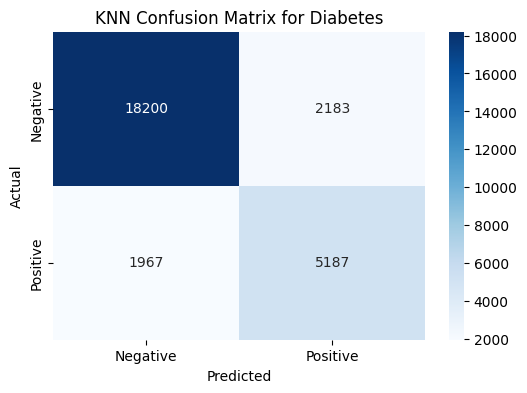


Confusion Matrix for hypertension:
[[25395   401]
 [  461  1280]]


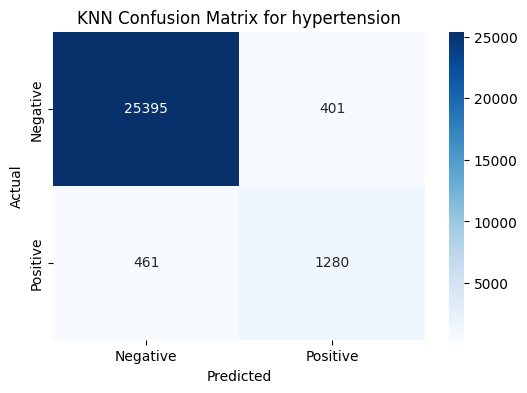


Confusion Matrix for stroke:
[[22097  1379]
 [  192  3869]]


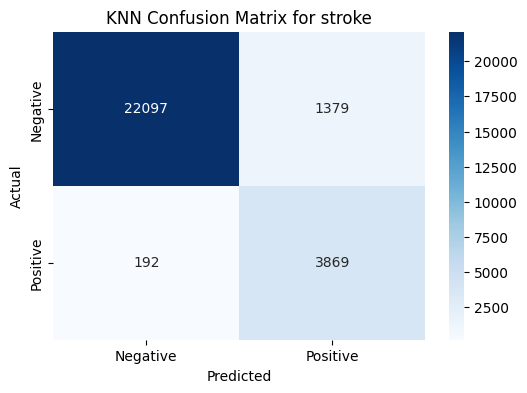

In [ ]:
for idx, target in enumerate(target_columns):
    print(f"\nConfusion Matrix for {target}:")
    cm = confusion_matrix(y_test.iloc[:, idx], y_pred_knn[:, idx])
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"KNN Confusion Matrix for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for target in target_columns:
    print(f"Training Logistic Regression for target: {target}")

    log_reg = LogisticRegression(max_iter=2000)
    log_reg.fit(X_train_scaled, y_train[target])

    y_pred_log_reg = log_reg.predict(X_test_scaled)

    print(f"Logistic Regression Evaluation for {target}:")
    print("Accuracy Score:", accuracy_score(y_test[target], y_pred_log_reg))
    print("Classification Report:\n", classification_report(y_test[target], y_pred_log_reg))

accuracy = accuracy_score(y_test[target], y_pred_log_reg)
model_name = "LogReg"
accuracy_results[model_name] = accuracy

Training Logistic Regression for target: Diabetes
Logistic Regression Evaluation for Diabetes:
Accuracy Score: 0.8480226604205251
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90     20383
           1       0.81      0.54      0.65      7154

    accuracy                           0.85     27537
   macro avg       0.83      0.75      0.78     27537
weighted avg       0.84      0.85      0.84     27537

Training Logistic Regression for target: hypertension
Logistic Regression Evaluation for hypertension:
Accuracy Score: 0.9358681047318154
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     25796
           1       0.07      0.00      0.00      1741

    accuracy                           0.94     27537
   macro avg       0.50      0.50      0.48     27537
weighted avg       0.88      0.94      0.91     27537

Training Logistic Regression f

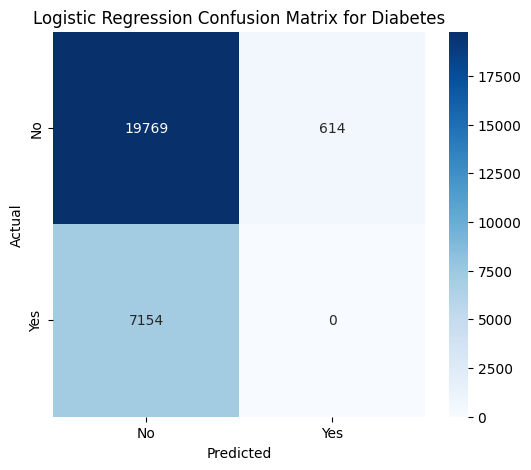

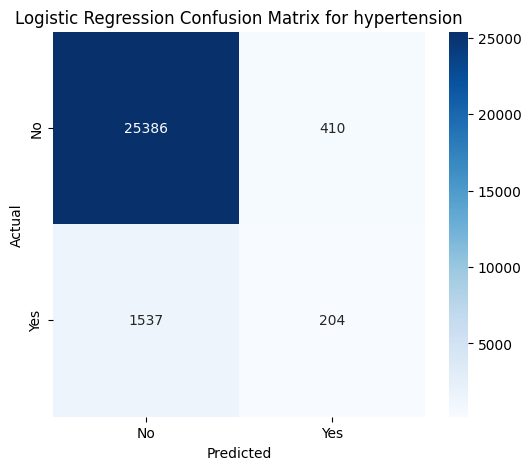

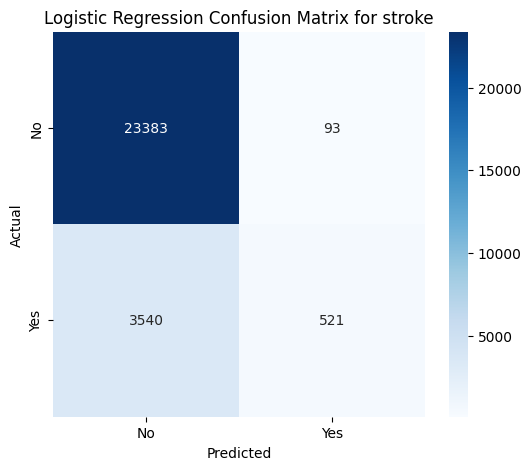

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name, target_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"{model_name} Confusion Matrix for {target_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for target in target_columns:
    y_pred_log_reg = log_reg.predict(X_test_scaled)
    plot_confusion_matrix(y_test[target], y_pred_log_reg, "Logistic Regression", target)


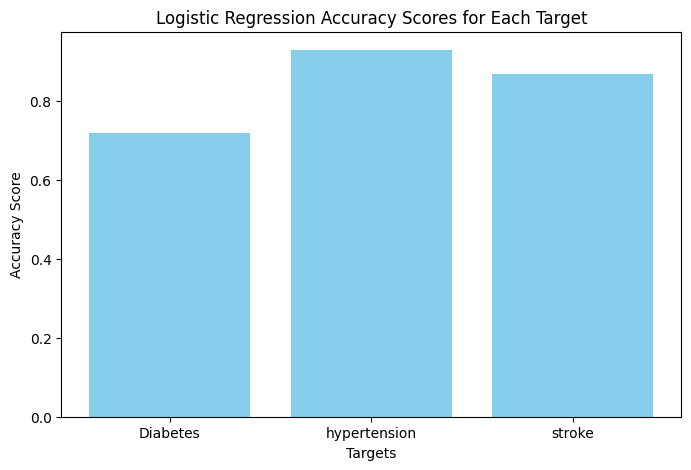

In [ ]:
accuracy_scores = {}
for target in target_columns:
    y_pred_log_reg = log_reg.predict(X_test_scaled)
    accuracy_scores[target] = accuracy_score(y_test[target], y_pred_log_reg)

plt.figure(figsize=(8, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel("Targets")
plt.ylabel("Accuracy Score")
plt.title("Logistic Regression Accuracy Scores for Each Target")
plt.show()


Linear Regression Evaluation for Diabetes:
Mean Squared Error (MSE): 0.1509088783984613
R-squared (R2): 0.21525058581730105
--------------------------------------------------
Confusion Matrix for Diabetes:
[[19983   400]
 [ 4715  2439]]


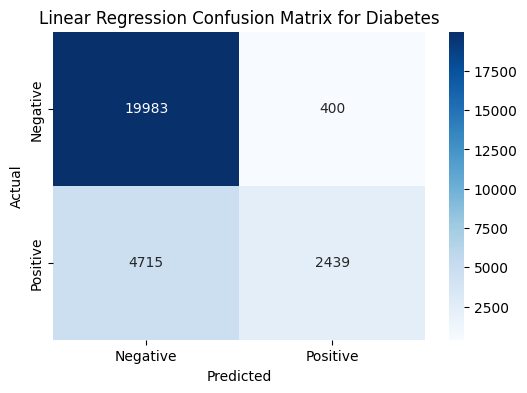

Linear Regression Evaluation for hypertension:
Mean Squared Error (MSE): 0.0569684159502299
R-squared (R2): 0.038130279325427785
--------------------------------------------------
Confusion Matrix for hypertension:
[[25796     0]
 [ 1741     0]]


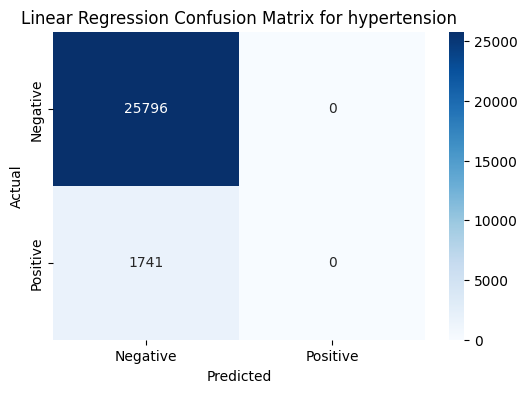

Linear Regression Evaluation for stroke:
Mean Squared Error (MSE): 0.11712953983551427
R-squared (R2): 0.06837186450134192
--------------------------------------------------
Confusion Matrix for stroke:
[[23420    56]
 [ 3688   373]]


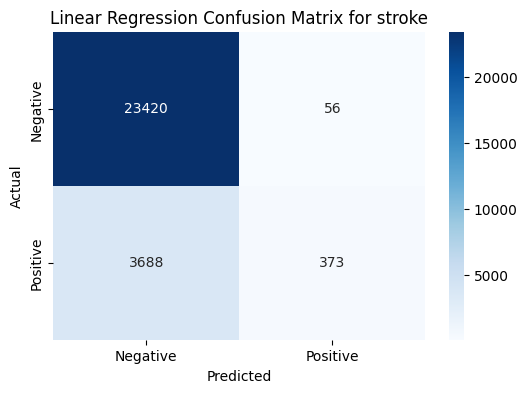

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

linear_regression_results = {}


for target in target_columns:
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train[target])

    y_pred_lin_reg = lin_reg.predict(X_test)

    mse = mean_squared_error(y_test[target], y_pred_lin_reg)
    r2 = r2_score(y_test[target], y_pred_lin_reg)

    linear_regression_results[target] = {
        "Mean Squared Error (MSE)": mse,
        "R-squared (R2)": r2
    }

    print(f"Linear Regression Evaluation for {target}:")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)
    print("-" * 50)

    y_pred_binary = (y_pred_lin_reg >= 0.5).astype(int)

    cm = confusion_matrix(y_test[target], y_pred_binary)
    print(f"Confusion Matrix for {target}:\n{cm}")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"Linear Regression Confusion Matrix for {target}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
accuracy =r2_score(y_test[target], y_pred_lin_reg)
model_name = "LinearReg"
accuracy_results[model_name] = accuracy

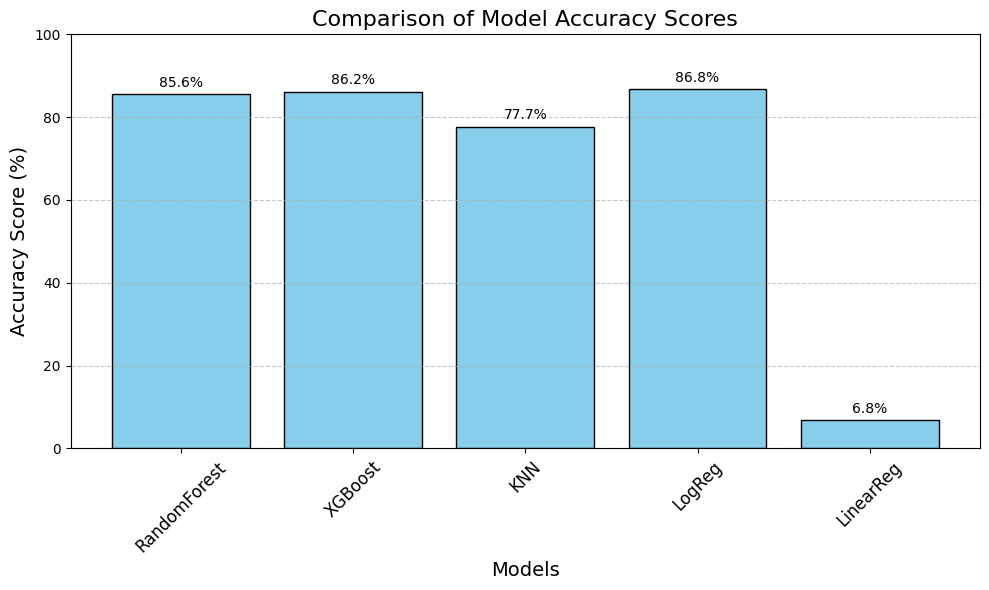

In [ ]:
import matplotlib.pyplot as plt

models = list(accuracy_results.keys())
accuracy_scores = list(accuracy_results.values())

accuracy_percentages = [score * 100 for score in accuracy_scores]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_percentages, color='skyblue', edgecolor='black')
plt.title('Comparison of Model Accuracy Scores', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Score (%)', fontsize=14)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)

for bar, percentage in zip(bars, accuracy_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
